In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer

backend = BasicAer.get_backend('unitary_simulator')

In [3]:
def DTC_1(nq,n):
    # Create a Quantum Circuit acting on a quantum register of i qubits
    circ = QuantumCircuit(nq)

    #creating the state array
    state_1 = []

    #Making the cicuit
    j=0
    while j<n:
    
        # Add RX gates
        i=0
        while i<nq:
            circ.x(i)
            i+=1
        i=0
        while i+1<nq:
            circ.cp(pi,i,i+1)
            i+=1
        
        circ.barrier(range(nq))
        meas = QuantumCircuit(nq, nq)
        meas.measure(range(nq), range(nq))
        qc = circ + meas
    
        # Use Aer's qasm_simulator
        backend = Aer.get_backend('qasm_simulator')
        job_1 = execute(qc, backend, shots=2000)
        result_1 = job_1.result()
        counts_1 = result_1.get_counts(qc)
        print(counts_1)
    
        state_1.append(counts_1)
    
        j+=1

    print(state_1)    
    print(qc.draw())
    
    mag_1 = []; t_1 = []
    for k in range(len(state_1)):
        if '0'*nq in state_1[k]:
            mag_1.append(1)
            mag_1.append(1)
        elif '1'*nq in state_1[k]:
            mag_1.append(-1)
            mag_1.append(-1)
        else: break
        t_1.append(k)
        t_1.append(k+1)
    
    plt.plot(t_1,mag_1)
    plt.title("Magnetisation of Qubits")
    plt.xlabel("Time")
    plt.ylabel("Magnetisation, M_z")
    return

{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
{'1111111111111111111111111': 2000}
{'0000000000000000000000000': 2000}
[{'1111111111111111111111111': 2000}, {'0000000000000000000000000': 2000}, {'1111111111111111111111111': 2000}, {'0000000000000000000000000': 2000}, {'1111111111111111111111111': 2000}, {'0000000000000000000000000': 2000}, {'1111111111111111111111111': 2000}, {'000000000000000000

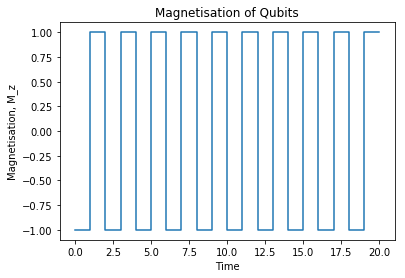

In [9]:
DTC_1(5,20)

In [5]:
def DTC(nq,n):
    # Create a Quantum Circuit acting on a quantum register of i qubits
    circ = QuantumCircuit(nq)

    #creating the state array
    state = []

    #Making the cicuit
    j=0

    while j<n:
    
        # Add RX gates
        i=0
        while i<nq:
            circ.rx(pi,i)
            i+=1
    
        #add barrier
        circ.barrier(range(nq))
        meas = QuantumCircuit(nq, nq)
        
        meas.measure(range(nq), range(nq))
        qc = circ + meas
    
        # Use Aer's qasm_simulator
        backend = Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=2000)
        result = job.result()
        counts = result.get_counts(qc)
        print(counts)
    
        state.append(counts)
    
        j+=1
    print(state)
    print(qc.draw())
    
    mag = []; t = []
    for k in range(len(state)):
        if '0'*nq in state[k]:
            mag.append(1)
            mag.append(1)
        elif '1'*nq in state[k]:
            mag.append(-1)
            mag.append(-1)
        else: break
        t.append(k)
        t.append(k+1)
    
    plt.plot(t,mag)
    plt.title("Magnetisation of Qubits")
    plt.xlabel("Time")
    plt.ylabel("Magnetisation, M_z")
    return

{'111': 2000}
{'000': 2000}
{'111': 2000}
{'000': 2000}
{'111': 2000}
{'000': 2000}
{'111': 2000}
{'000': 2000}
{'111': 2000}
{'000': 2000}
[{'111': 2000}, {'000': 2000}, {'111': 2000}, {'000': 2000}, {'111': 2000}, {'000': 2000}, {'111': 2000}, {'000': 2000}, {'111': 2000}, {'000': 2000}]
     ┌───────┐ ░ ┌───────┐ ░ ┌───────┐ ░ ┌───────┐ ░ ┌───────┐ ░ ┌───────┐ ░ »
q_0: ┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─»
     ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ »
q_1: ┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─»
     ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ ├───────┤ ░ »
q_2: ┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─┤ RX(π) ├─░─»
     └───────┘ ░ └───────┘ ░ └───────┘ ░ └───────┘ ░ └───────┘ ░ └───────┘ ░ »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             

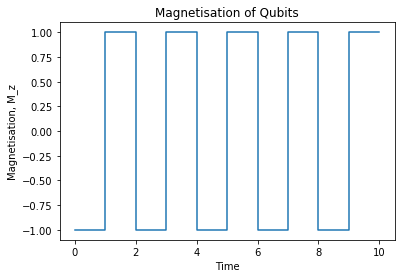

In [6]:
DTC(3,10)